# 1. Importing Python Libraries and .CSV File

In [1]:
import pandas as pd
pd.set_option('display.max_columns',999)
import numpy as np
import itertools
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

Creating a pandas dataframe from the .csv file.

In [2]:
df = pd.read_csv('analytic_data2019.csv')

Checking to see that the dataframe has been created correctly. This also allows us to take a first look at what variables are contained in the dataset.

In [3]:
df.head()

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
0       statecode       countycode          fipscode              state   
1              00              000             00000                 US   
2              01              000             01000                 AL   
3              01              001             01001                 AL   
4              01              003             01003                 AL   

             Name Release Year County Ranked (Yes=1/No=0)  \
0          county         year              county_ranked   
1   United States         2019                        NaN   
2         Alabama         2019                        NaN   
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   

  Premature death raw value Premature death numerator  \
0             v001_rawvalue            v001_numerator   
1               6900.630354                   3745538   
2              9917.2328984                     80440   
3              8824.0571232                       815   
4              7224.6321603                      2827   

  Premature death denominator Premature death CI low Premature death CI high  \
0            v001_denominator             v001_cilow             v001_cihigh   
1                   908266078           6890.3492059             6910.911502   
2                    13636816           9815.1909454            10019.274852   
3                      156132           7935.3258295            9712.7884169   
4                      576496           6794.1283802            7655.1359403   

  Premature death (Black) Premature death (Hispanic) Premature death (White)  \
0         v001_race_black         v001_race_hispanic         v001_race_white   
1                     NaN                        NaN                     NaN   
2                     NaN                        NaN                     NaN   
3            10471.252986                        NaN            8706.6588323   
4            10042.472874               3086.6056945            7277.7807271   

  Poor or fair health raw value Poor or fair health numerator  \
0                 v002_rawvalue                v002_numerator   
1                           NaN                           NaN   
2                  0.2140240566                           NaN   
3                  0.1841112436                           NaN   
4                  0.1806045782                           NaN   

  Poor or fair health denominator Poor or fair health CI low  \
0                v002_denominator                 v002_cilow   
1                             NaN                        NaN   
2                             NaN               0.2009537484   
3                             NaN               0.1784404913   
4                             NaN               0.1752150037   

  Poor or fair health CI high Poor physical health days raw value  \
0                 v002_cihigh                       v036_rawvalue   
1                         NaN                                 NaN   
2                0.2277022217                        4.4004575204   
3                0.1903231618                        4.2005779826   
4                0.1858667304                        4.0987477691   

  Poor physical health days numerator Poor physical health days denominator  \
0                      v036_numerator                      v036_denominator   
1                                 NaN                                   NaN   
2                                 NaN                                   NaN   
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   

  Poor physical health days CI low Poor physical health days CI high  \
0                       v036_cilow                       v036_cihigh   
1                              NaN                               NaN 

# 2. Exploratory Data Analysis

#### This is the data wrangling section of the project. In this section the data is explored and cleaned, and relevent variables are chosen to be taken forward into the modelling section.

A first check to see how many columns and rows the dataset is made out of.

In [4]:
len(df.columns)

534

In [5]:
len(df)

3195

In the 'Country Ranked' column the rows are given a 1 or 0 depending on if that row is a county, or if it a statewide/countrywide average. Therefore, any row without a 1 in this column should be removed from the dataset as we are interested in doing a comparison at a county level. The first row is also removed as this contains a second level of column headings that are not needed.

In [6]:
df.drop(df.index[[0]], inplace=True)
df.dropna(axis=0, subset=['County Ranked (Yes=1/No=0)'], inplace=True)

In [7]:
len(df)

3142

In [8]:
df.head()

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
3              01              001             01001                 AL   
4              01              003             01003                 AL   
5              01              005             01005                 AL   
6              01              007             01007                 AL   
7              01              009             01009                 AL   

             Name Release Year County Ranked (Yes=1/No=0)  \
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   
5  Barbour County         2019                          1   
6     Bibb County         2019                          1   
7   Blount County         2019                          1   

  Premature death raw value Premature death numerator  \
3              8824.0571232                       815   
4              7224.6321603                      2827   
5               9586.165037                       451   
6              11783.543675                       445   
7              10908.101822                      1050   

  Premature death denominator Premature death CI low Premature death CI high  \
3                      156132           7935.3258295            9712.7884169   
4                      576496           6794.1283802            7655.1359403   
5                       72222           8200.1175409            10972.212533   
6                       63653           10159.978321            13407.109028   
7                      161107           9895.5825723            11920.621071   

  Premature death (Black) Premature death (Hispanic) Premature death (White)  \
3            10471.252986                        NaN            8706.6588323   
4            10042.472874               3086.6056945            7277.7807271   
5            11332.562909                        NaN            7309.6367188   
6             14812.53928                        NaN            11327.563749   
7                     NaN               5619.6451858            11336.046321   

  Poor or fair health raw value Poor or fair health numerator  \
3                  0.1841112436                           NaN   
4                  0.1806045782                           NaN   
5                  0.2577341563                           NaN   
6                  0.1999691186                           NaN   
7                  0.2109532316                           NaN   

  Poor or fair health denominator Poor or fair health CI low  \
3                             NaN               0.1784404913   
4                             NaN               0.1752150037   
5                             NaN               0.2510432524   
6                             NaN               0.1934741206   
7                             NaN               0.2027951978   

  Poor or fair health CI high Poor physical health days raw value  \
3                0.1903231618                        4.2005779826   
4                0.1858667304                        4.0987477691   
5                 0.264992104                        5.0674383044   
6                0.2066359207                        4.3633772783   
7                0.2188227437                        4.5127526482   

  Poor physical health days numerator Poor physical health days denominator  \
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   
5                                 NaN                                   NaN   
6                                 NaN                                   NaN   
7                                 NaN                                   NaN   

  Poor physical health days CI low Poor physical health days CI high  \
3                     4.0359984381                      4.3675094941   
4                     3.9296811852                      4.2613114654 

As the dataset is very large (534 x 3195), to reduce the amount of work needed for cleaning we first chose the variables that were going to be relevant to us. In order to work out a variables importance, a correlation matrix was made.

As the correlation matrix requires the data be in numerical form, the dataframe was converted to contain floats.

In [9]:
df2 = df.drop(columns=['State Abbreviation','Name'])
df2 = df2.astype(float)

All of the columns that cointained a breakdown of the variable by race had the majority of values missing. Therefore they were removed. from the dataset in the following cell. The confidence interval columns were also not going to be used and so they too were removed.

In [10]:
race_CI = ['White','white','Black','black','Hispanic','hispanic','CI']

cols_to_drop = []

for element in race_CI:
    
    df2_filtered = df2.filter(regex=element)
    cols_to_drop.append(list(df2_filtered.columns))

cols_to_drop = list(itertools.chain(*cols_to_drop))
cols_to_drop

['Premature death (White)',
 'Low birthweight (White)',
 'Teen births (White)',
 'Preventable hospital stays (White)',
 'Mammography screening (White)',
 'Flu vaccinations (White)',
 'Children in poverty (White)',
 'Driving alone to work (White)',
 'Life expectancy (White)',
 'Premature age-adjusted mortality (White)',
 'Child mortality (White)',
 'Infant mortality (White)',
 'Median household income (White)',
 'Residential segregation - Black/White raw value',
 'Residential segregation - Black/White numerator',
 'Residential segregation - Black/White denominator',
 'Residential segregation - Black/White CI low',
 'Residential segregation - Black/White CI high',
 'Residential segregation - non-white/white raw value',
 'Residential segregation - non-white/white numerator',
 'Residential segregation - non-white/white denominator',
 'Residential segregation - non-white/white CI low',
 'Residential segregation - non-white/white CI high',
 '% Non-Hispanic white raw value',
 '% Non-Hispanic 

A new dataframe is then created with all of the unwanted columns removed.

In [11]:
df3 = df2.drop(columns=cols_to_drop)

In [12]:
df3.head()

State FIPS Code  County FIPS Code  5-digit FIPS Code  Release Year  \
3              1.0               1.0             1001.0        2019.0   
4              1.0               3.0             1003.0        2019.0   
5              1.0               5.0             1005.0        2019.0   
6              1.0               7.0             1007.0        2019.0   
7              1.0               9.0             1009.0        2019.0   

   County Ranked (Yes=1/No=0)  Premature death raw value  \
3                         1.0                8824.057123   
4                         1.0                7224.632160   
5                         1.0                9586.165037   
6                         1.0               11783.543675   
7                         1.0               10908.101822   

   Premature death numerator  Premature death denominator  \
3                      815.0                     156132.0   
4                     2827.0                     576496.0   
5                      451.0                      72222.0   
6                      445.0                      63653.0   
7                     1050.0                     161107.0   

   Poor or fair health raw value  Poor or fair health numerator  \
3                       0.184111                            NaN   
4                       0.180605                            NaN   
5                       0.257734                            NaN   
6                       0.199969                            NaN   
7                       0.210953                            NaN   

   Poor or fair health denominator  Poor physical health days raw value  \
3                              NaN                             4.200578   
4                              NaN                             4.098748   
5                              NaN                             5.067438   
6                              NaN                             4.363377   
7                              NaN                             4.512753   

   Poor physical health days numerator  Poor physical health days denominator  \
3                                  NaN                                    NaN   
4                                  NaN                                    NaN   
5                                  NaN                                    NaN   
6                                  NaN                                    NaN   
7                                  NaN                                    NaN   

   Poor mental health days raw value  Poor mental health days numerator  \
3                           4.306739                                NaN   
4                           4.249649                                NaN   
5                           4.634994                                NaN   
6                           4.315710                                NaN   
7                           4.701599                                NaN   

   Poor mental health days denominator  Low birthweight raw value  \
3                                  NaN                   0.084757   
4                                  NaN                   0.083387   
5                                  NaN                   0.109526   
6                                  NaN                   0.111050   
7                                  NaN                   0.079268   

   Low birthweight numerator  Low birthweight denominator  \
3                      377.0                       4448.0   
4                     1299.0                      15578.0   
5                      215.0                       1963.0   
6                      202.0                       1819.0   
7                      377.0                       4756.0   

   Adult smoking raw value  Adult smoking numerator  \
3                 0.191247                      NaN   
4                 0.167955                      NaN   
5                 0.215409                      NaN   
6                 0.199164                

A correlation matrix was then created from the new dataframe.

In [13]:
corr_matrix = df3.corr()

In [14]:
len(corr_matrix)

290

The correlation matrix was then plotted. Due to the high number of vaariables not much can be learned from this visualisation.

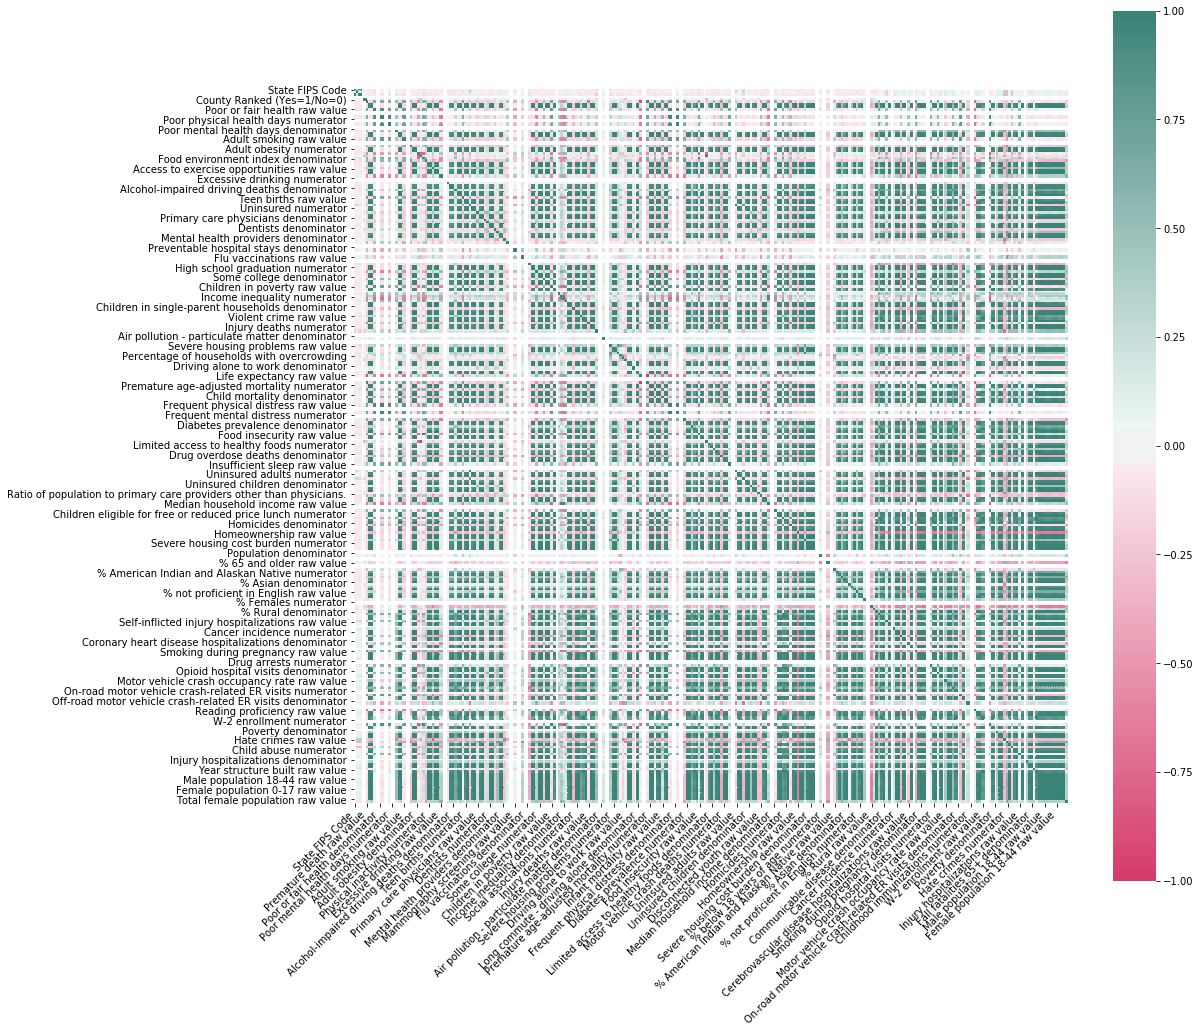

In [15]:
plt.figure(figsize=(16,16))
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0, 
    cmap=sns.diverging_palette(0,534,n=534),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

A list of the 60 variables that correlated most with the flu vaccine rate was created. Absolute values were taken for this as we are interested in large positive and negative correlations.

In [16]:
corr_matrix["Flu vaccinations raw value"].abs().sort_values(ascending=False)[:60]

Flu vaccinations raw value                                  1.000000
Hate crimes numerator                                       0.681341
Motor vehicle crash deaths raw value                        0.501493
Disconnected youth raw value                                0.483920
Firearm fatalities raw value                                0.458927
Homicides raw value                                         0.443868
Mammography screening raw value                             0.441988
Childhood immunizations raw value                           0.424479
Reading proficiency numerator                               0.421802
Child mortality raw value                                   0.420805
Children in poverty raw value                               0.401432
Teen births raw value                                       0.399579
Child abuse raw value                                       0.393808
Median household income raw value                           0.392461
Male population 65+ raw value     

In [17]:
df_relevant = df[['State Abbreviation','Name','5-digit FIPS Code','Flu vaccinations raw value',
              'Primary care physicians raw value' , 'Ratio of population to primary care physicians.' , 
              'Child mortality raw value' , 'Low birthweight raw value' , 
              'Teen births raw value' , 'Children in poverty raw value' , 
              'Children in single-parent households raw value' , 'Adult smoking raw value' , 
              'Adult obesity raw value' , 'Physical inactivity raw value' , 'Excessive drinking raw value' , 
              'Sexually transmitted infections raw value' , 'Uninsured raw value' , 
              'Preventable hospital stays raw value' , 'Injury deaths raw value' , 'Social associations raw value' , 
              'High school graduation raw value' , 'Some college raw value' , 'Disconnected youth raw value' , 
              'Poor physical health days raw value' , 'Severe housing problems raw value' , 
              'Percentage of households with overcrowding']]

In [18]:
cols = df_relevant.columns
cols_included = list(filter(lambda col: col != 'State Abbreviation' and col != 'Name', cols))

for col in cols_included:
    df_relevant[col] = df_relevant[col].astype(float)

In [19]:
df_relevant.set_index('Name')

State Abbreviation  5-digit FIPS Code  \
Name                                                      
Autauga County                    AL             1001.0   
Baldwin County                    AL             1003.0   
Barbour County                    AL             1005.0   
Bibb County                       AL             1007.0   
Blount County                     AL             1009.0   
...                              ...                ...   
Sweetwater County                 WY            56037.0   
Teton County                      WY            56039.0   
Uinta County                      WY            56041.0   
Washakie County                   WY            56043.0   
Weston County                     WY            56045.0   

                   Flu vaccinations raw value  \
Name                                            
Autauga County                           0.41   
Baldwin County                           0.45   
Barbour County                           0.37   
Bibb County                              0.39   
Blount County                            0.38   
...                                       ...   
Sweetwater County                        0.37   
Teton County                             0.47   
Uinta County                             0.33   
Washakie County                          0.43   
Weston County                            0.17   

                   Primary care physicians raw value  \
Name                                                   
Autauga County                              0.000415   
Baldwin County                              0.000729   
Barbour County                              0.000385   
Bibb County                                 0.000574   
Blount County                               0.000225   
...                                              ...   
Sweetwater County                           0.000340   
Teton County                                0.001207   
Uinta County                                0.000385   
Washakie County                             0.000486   
Weston County                               0.000415   

                   Ratio of population to primary care physicians.  \
Name                                                                 
Autauga County                                         2409.391304   
Baldwin County                                         1372.125000   
Barbour County                                         2596.500000   
Bibb County                                            1741.769231   
Blount County                                          4438.769231   
...                                                            ...   
Sweetwater County                                      2944.333333   
Teton County                                            828.250000   
Uinta County                                           2596.625000   
Washakie County                                        2058.750000   
Weston County                                          2412.000000   

                   Child mortality raw value  Low birthweight raw value  \
Name                                                                      
Autauga County                     53.279441                   0.084757   
Baldwin County                     47.000017                   0.083387   
Barbour County                     77.080027                   0.109526   
Bibb County                       111.749681                   0.111050   
Blount County                      76.032935                   0.079268   
...                                      ...                        ...   
Sweetwater County                  37.845339                   0.094205   
Teton County                             NaN                   0.074739   
Uinta County                             NaN                   0.096475   
Washakie County                          NaN                   0.073209   
Weston County                            NaN                   0.060886 

In [20]:
corr_matrix2 = df_relevant.corr()

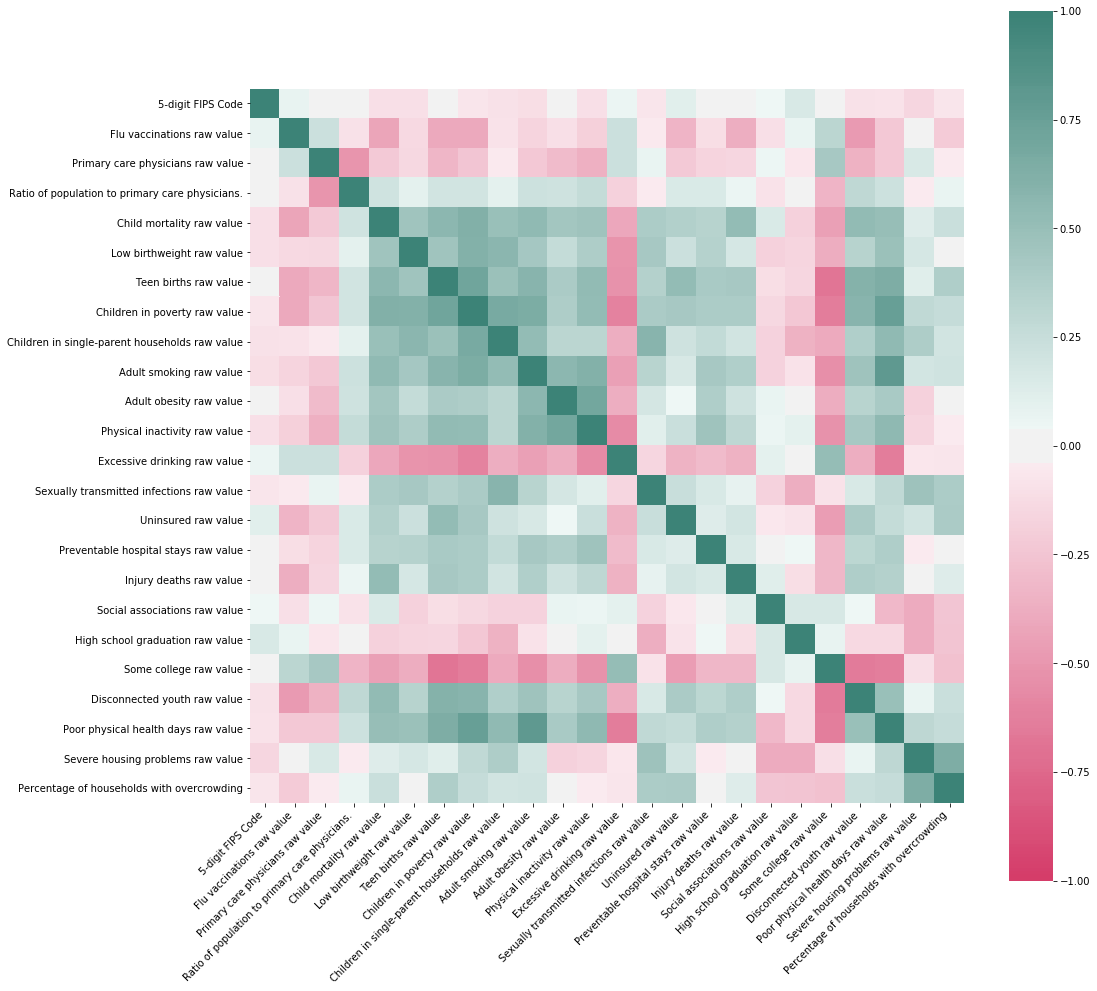

In [21]:
plt.figure(figsize=(16,16))
ax = sns.heatmap(
    corr_matrix2, 
    vmin=-1, vmax=1, center=0, 
    cmap=sns.diverging_palette(0,534,n=534),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

In [22]:
df_relevant_list = ['Primary care physicians raw value' , 'Ratio of population to primary care physicians.' , 
              'Child mortality raw value' , 'Low birthweight raw value' , 
              'Teen births raw value' , 'Children in poverty raw value' , 
              'Children in single-parent households raw value' , 'Adult smoking raw value' , 
              'Adult obesity raw value' , 'Physical inactivity raw value' , 'Excessive drinking raw value' , 
              'Sexually transmitted infections raw value' , 'Uninsured raw value' , 
              'Preventable hospital stays raw value' , 'Injury deaths raw value' , 'Social associations raw value' , 
              'High school graduation raw value' , 'Some college raw value' , 'Disconnected youth raw value' , 
              'Poor physical health days raw value' , 'Severe housing problems raw value' , 
              'Percentage of households with overcrowding']

## Merging religion dataframe.

In [23]:
df_religion = pd.read_excel ('US_religion_census_2010.xlsx')
df_religion = df_religion[['FIPS','CATHRATE']]
df_religion.set_index('FIPS', inplace=True)
df_religion.head()

CATHRATE
FIPS             
1001.0  32.358889
1003.0  76.858889
1005.0  20.940000
1007.0        NaN
1009.0  82.760000

In [24]:
len(df_religion)

3150

In [25]:
df_relevant_religion = df_relevant.merge(df_religion, left_on='5-digit FIPS Code', right_on='FIPS')

In [26]:
len(df_relevant_religion)

3140

In [27]:
df_relevant_religion.head()

State Abbreviation            Name  5-digit FIPS Code  \
0                 AL  Autauga County             1001.0   
1                 AL  Baldwin County             1003.0   
2                 AL  Barbour County             1005.0   
3                 AL     Bibb County             1007.0   
4                 AL   Blount County             1009.0   

   Flu vaccinations raw value  Primary care physicians raw value  \
0                        0.41                           0.000415   
1                        0.45                           0.000729   
2                        0.37                           0.000385   
3                        0.39                           0.000574   
4                        0.38                           0.000225   

   Ratio of population to primary care physicians.  Child mortality raw value  \
0                                      2409.391304                  53.279441   
1                                      1372.125000                  47.000017   
2                                      2596.500000                  77.080027   
3                                      1741.769231                 111.749681   
4                                      4438.769231                  76.032935   

   Low birthweight raw value  Teen births raw value  \
0                   0.084757              26.524208   
1                   0.083387              29.594009   
2                   0.109526              45.092838   
3                   0.111050              45.454545   
4                   0.079268              35.600555   

   Children in poverty raw value  \
0                          0.193   
1                          0.147   
2                          0.503   
3                          0.273   
4                          0.185   

   Children in single-parent households raw value  Adult smoking raw value  \
0                                        0.247001                 0.191247   
1                                        0.251841                 0.167955   
2                                        0.572157                 0.215409   
3                                        0.295654                 0.199164   
4                                        0.295697                 0.196522   

   Adult obesity raw value  Physical inactivity raw value  \
0                    0.375                          0.311   
1                    0.310                          0.238   
2                    0.443                          0.282   
3                    0.378                          0.349   
4                    0.344                          0.285   

   Excessive drinking raw value  Sexually transmitted infections raw value  \
0                      0.168780                                      341.2   
1                      0.167150                                      338.8   
2                      0.126987                                      557.9   
3                      0.159252                                      302.1   
4                      0.153787                                      114.3   

   Uninsured raw value  Preventable hospital stays raw value  \
0             0.085010                                6599.0   
1             0.106993                                3833.0   
2             0.125132                                4736.0   
3             0.096801                                5998.0   
4             0.121140                                4162.0   

   Injury deaths raw value  Social associations raw value  \
0                74.031808                      12.631731   
1                69.374289                      10.692213   
2                72.900134                       8.472944   
3               100.077937                      10.157665   
4               105.197227                       9.011507   

   High school graduation raw value  Some college raw value  \
0                          0.900000                0.608547   
1                   

In [28]:
df_relevant_religion['CATHRATE'] = df_relevant_religion['CATHRATE']/100

In the cells below we create another dataframe and group the counties by state. The mean of each state variable is taken.

In [29]:
df_state_group = df_relevant_religion

In [30]:
cols = df_state_group.columns
cols_included = list(filter(lambda col: col != 'State Abbreviation' and col != 'Name', cols))

for col in cols_included:
    df_state_group[col] = df_state_group[col].astype(float)

In [31]:
df_state_group = df_state_group.groupby(['State Abbreviation']).median()

From this we can then find the 10 states with the highest and lowest flu vaccine rates.

In [32]:
df_state_group.sort_values(by='Flu vaccinations raw value', ascending=True, inplace=True)
df_state_group2 = df_state_group['Flu vaccinations raw value']
df_lowest_state_group = df_state_group2.to_frame().head(10)
df_highest_state_group = df_state_group2.to_frame().tail(10)

In [33]:
df_state_group.head(50)

5-digit FIPS Code  Flu vaccinations raw value  \
State Abbreviation                                                  
AK                             2157.0                       0.250   
NV                            32017.0                       0.310   
SD                            46067.0                       0.340   
ID                            16044.0                       0.345   
MT                            30056.0                       0.350   
AZ                             4013.0                       0.360   
NM                            35029.0                       0.360   
NE                            31093.0                       0.360   
DC                            11001.0                       0.360   
TX                            48254.0                       0.365   
HI                            15005.0                       0.365   
MO                            29115.0                       0.370   
KS                            20105.0                       0.370   
MS                            28082.0                       0.370   
WA                            53039.0                       0.380   
OR                            41036.0                       0.380   
FL                            12069.0                       0.380   
LA                            22064.0                       0.390   
ND                            38053.0                       0.390   
WV                            54055.0                       0.390   
CA                             6058.0                       0.395   
CO                             8062.0                       0.400   
AL                             1067.0                       0.400   
AR                             5075.0                       0.410   
WY                            56023.0                       0.410   
MI                            26083.0                       0.410   
GA                            13161.0                       0.410   
KY                            21120.0                       0.410   
ME                            23016.0                       0.415   
UT                            49029.0                       0.420   
IL                            17102.0                       0.425   
SC                            45046.0                       0.430   
OK                            40077.0                       0.440   
OH                            39088.0                       0.460   
PA                            42067.0                       0.460   
IN                            18092.0                       0.470   
TN                            47095.0                       0.470   
VT                            50014.0                       0.475   
VA                            51139.0                       0.480   
MN                            27087.0                       0.480   
NC                            37100.0                       0.480   
NH                            33010.0                       0.485   
NJ                            34021.0                       0.490   
RI                            44005.0                       0.490   
NY                            36062.0                       0.490   
MD                            24026.0                       0.490   
IA                            19099.0                       0.490   
WI                            55072.0                       0.500   
MA                            25014.0                       0.510   
CT                             9008.0                       0.520   

                    Primary care physicians raw value  \
State Abbreviation                                      
AK                                           0.000777   
NV                                           0.000522   
SD                                           0.000603   
ID                                           0.000513   
MT                                           0.000550   
AZ                              

In [34]:
df_relevant_religion.head()

State Abbreviation            Name  5-digit FIPS Code  \
0                 AL  Autauga County             1001.0   
1                 AL  Baldwin County             1003.0   
2                 AL  Barbour County             1005.0   
3                 AL     Bibb County             1007.0   
4                 AL   Blount County             1009.0   

   Flu vaccinations raw value  Primary care physicians raw value  \
0                        0.41                           0.000415   
1                        0.45                           0.000729   
2                        0.37                           0.000385   
3                        0.39                           0.000574   
4                        0.38                           0.000225   

   Ratio of population to primary care physicians.  Child mortality raw value  \
0                                      2409.391304                  53.279441   
1                                      1372.125000                  47.000017   
2                                      2596.500000                  77.080027   
3                                      1741.769231                 111.749681   
4                                      4438.769231                  76.032935   

   Low birthweight raw value  Teen births raw value  \
0                   0.084757              26.524208   
1                   0.083387              29.594009   
2                   0.109526              45.092838   
3                   0.111050              45.454545   
4                   0.079268              35.600555   

   Children in poverty raw value  \
0                          0.193   
1                          0.147   
2                          0.503   
3                          0.273   
4                          0.185   

   Children in single-parent households raw value  Adult smoking raw value  \
0                                        0.247001                 0.191247   
1                                        0.251841                 0.167955   
2                                        0.572157                 0.215409   
3                                        0.295654                 0.199164   
4                                        0.295697                 0.196522   

   Adult obesity raw value  Physical inactivity raw value  \
0                    0.375                          0.311   
1                    0.310                          0.238   
2                    0.443                          0.282   
3                    0.378                          0.349   
4                    0.344                          0.285   

   Excessive drinking raw value  Sexually transmitted infections raw value  \
0                      0.168780                                      341.2   
1                      0.167150                                      338.8   
2                      0.126987                                      557.9   
3                      0.159252                                      302.1   
4                      0.153787                                      114.3   

   Uninsured raw value  Preventable hospital stays raw value  \
0             0.085010                                6599.0   
1             0.106993                                3833.0   
2             0.125132                                4736.0   
3             0.096801                                5998.0   
4             0.121140                                4162.0   

   Injury deaths raw value  Social associations raw value  \
0                74.031808                      12.631731   
1                69.374289                      10.692213   
2                72.900134                       8.472944   
3               100.077937                      10.157665   
4               105.197227                       9.011507   

   High school graduation raw value  Some college raw value  \
0                          0.900000                0.608547   
1                   

In [35]:
list_county_names = list(df_relevant_religion['Name'])
df_relevant_religion.drop(columns=['Name'], inplace=True)

In [36]:
df_relevant_religion.iloc[:,1:] = df_relevant_religion.groupby("State Abbreviation").transform(lambda x: x.fillna(x.median()))

In [37]:
df_relevant_religion['Name'] = list_county_names

In [38]:
df_relevant_religion.isna().sum()

State Abbreviation                                 0
5-digit FIPS Code                                  0
Flu vaccinations raw value                         0
Primary care physicians raw value                  0
Ratio of population to primary care physicians.    0
Child mortality raw value                          0
Low birthweight raw value                          0
Teen births raw value                              0
Children in poverty raw value                      0
Children in single-parent households raw value     0
Adult smoking raw value                            0
Adult obesity raw value                            0
Physical inactivity raw value                      0
Excessive drinking raw value                       0
Sexually transmitted infections raw value          0
Uninsured raw value                                0
Preventable hospital stays raw value               0
Injury deaths raw value                            0
Social associations raw value                 

In [39]:
names = df_relevant_religion['Name']
df_relevant_religion.drop(labels=['Name'], axis=1,inplace = True)
df_relevant_religion.insert(2, 'Name', names)
df_relevant_religion.set_index('Name')

State Abbreviation  5-digit FIPS Code  \
Name                                                      
Autauga County                    AL             1001.0   
Baldwin County                    AL             1003.0   
Barbour County                    AL             1005.0   
Bibb County                       AL             1007.0   
Blount County                     AL             1009.0   
...                              ...                ...   
Sweetwater County                 WY            56037.0   
Teton County                      WY            56039.0   
Uinta County                      WY            56041.0   
Washakie County                   WY            56043.0   
Weston County                     WY            56045.0   

                   Flu vaccinations raw value  \
Name                                            
Autauga County                           0.41   
Baldwin County                           0.45   
Barbour County                           0.37   
Bibb County                              0.39   
Blount County                            0.38   
...                                       ...   
Sweetwater County                        0.37   
Teton County                             0.47   
Uinta County                             0.33   
Washakie County                          0.43   
Weston County                            0.17   

                   Primary care physicians raw value  \
Name                                                   
Autauga County                              0.000415   
Baldwin County                              0.000729   
Barbour County                              0.000385   
Bibb County                                 0.000574   
Blount County                               0.000225   
...                                              ...   
Sweetwater County                           0.000340   
Teton County                                0.001207   
Uinta County                                0.000385   
Washakie County                             0.000486   
Weston County                               0.000415   

                   Ratio of population to primary care physicians.  \
Name                                                                 
Autauga County                                         2409.391304   
Baldwin County                                         1372.125000   
Barbour County                                         2596.500000   
Bibb County                                            1741.769231   
Blount County                                          4438.769231   
...                                                            ...   
Sweetwater County                                      2944.333333   
Teton County                                            828.250000   
Uinta County                                           2596.625000   
Washakie County                                        2058.750000   
Weston County                                          2412.000000   

                   Child mortality raw value  Low birthweight raw value  \
Name                                                                      
Autauga County                     53.279441                   0.084757   
Baldwin County                     47.000017                   0.083387   
Barbour County                     77.080027                   0.109526   
Bibb County                       111.749681                   0.111050   
Blount County                      76.032935                   0.079268   
...                                      ...                        ...   
Sweetwater County                  37.845339                   0.094205   
Teton County                       58.801791                   0.074739   
Uinta County                       58.801791                   0.096475   
Washakie County                    58.801791                   0.073209   
Weston County                      58.801791                   0.060886 

In [40]:
df_relevant_religion2 = df_relevant_religion.iloc[:,3:]

In [41]:
y = df_relevant_religion2['Flu vaccinations raw value']
X = df_relevant_religion2.drop(columns='Flu vaccinations raw value', axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)

In [43]:
df_relevant_religion

State Abbreviation  5-digit FIPS Code               Name  \
0                    AL             1001.0     Autauga County   
1                    AL             1003.0     Baldwin County   
2                    AL             1005.0     Barbour County   
3                    AL             1007.0        Bibb County   
4                    AL             1009.0      Blount County   
...                 ...                ...                ...   
3135                 WY            56037.0  Sweetwater County   
3136                 WY            56039.0       Teton County   
3137                 WY            56041.0       Uinta County   
3138                 WY            56043.0    Washakie County   
3139                 WY            56045.0      Weston County   

      Flu vaccinations raw value  Primary care physicians raw value  \
0                           0.41                           0.000415   
1                           0.45                           0.000729   
2                           0.37                           0.000385   
3                           0.39                           0.000574   
4                           0.38                           0.000225   
...                          ...                                ...   
3135                        0.37                           0.000340   
3136                        0.47                           0.001207   
3137                        0.33                           0.000385   
3138                        0.43                           0.000486   
3139                        0.17                           0.000415   

      Ratio of population to primary care physicians.  \
0                                         2409.391304   
1                                         1372.125000   
2                                         2596.500000   
3                                         1741.769231   
4                                         4438.769231   
...                                               ...   
3135                                      2944.333333   
3136                                       828.250000   
3137                                      2596.625000   
3138                                      2058.750000   
3139                                      2412.000000   

      Child mortality raw value  Low birthweight raw value  \
0                     53.279441                   0.084757   
1                     47.000017                   0.083387   
2                     77.080027                   0.109526   
3                    111.749681                   0.111050   
4                     76.032935                   0.079268   
...                         ...                        ...   
3135                  37.845339                   0.094205   
3136                  58.801791                   0.074739   
3137                  58.801791                   0.096475   
3138                  58.801791                   0.073209   
3139                  58.801791                   0.060886   

      Teen births raw value  Children in poverty raw value  \
0                 26.524208                          0.193   
1                 29.594009                          0.147   
2                 45.092838                          0.503   
3                 45.454545                          0.273   
4                 35.600555                          0.185   
...                     ...                            ...   
3135              34.261671                          0.134   
3136              11.641444                          0.069   
3137              31.798673                          0.118   
3138              27.649770                          0.140   
3139              32.462391                          0.140   

      Children in single-parent households raw value  Adult smoking raw value  \
0                                           0.247001                 0.191247   
1                                 

In [44]:
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [55]:
degree = 1

# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree)
    
# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train_scaled)
    
# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly = LinearRegression().fit(X_poly_train, y_train)

# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test_scaled)

# Get predicted values for transformed polynomial test data 
y_pred = reg_poly.predict(X_poly_test)

# Evaluate model performance on test data
print("degree %d:" % degree, r2_score(y_test, y_pred))

# Transform the full data
X_poly = poly.transform(X)
    
# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly_train)

# cv_results = cross_validate(lin_reg, X_train_scaled, y_train, cv=5)

degree 1: 0.3315168131914852
